# Movie Correlation Project

## Importing Libraries

In [40]:
#import libaries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Read in the data

In [41]:
#read data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

In [42]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col} - {percent_missing}')

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [43]:
df = df.dropna()
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [45]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col} - {percent_missing}')

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0
yearcorrect - 0.0


In [46]:
# Data types for our columns
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [47]:
# Correcting data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')   

In [48]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [81]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


## Scatter plot with budget vs gross

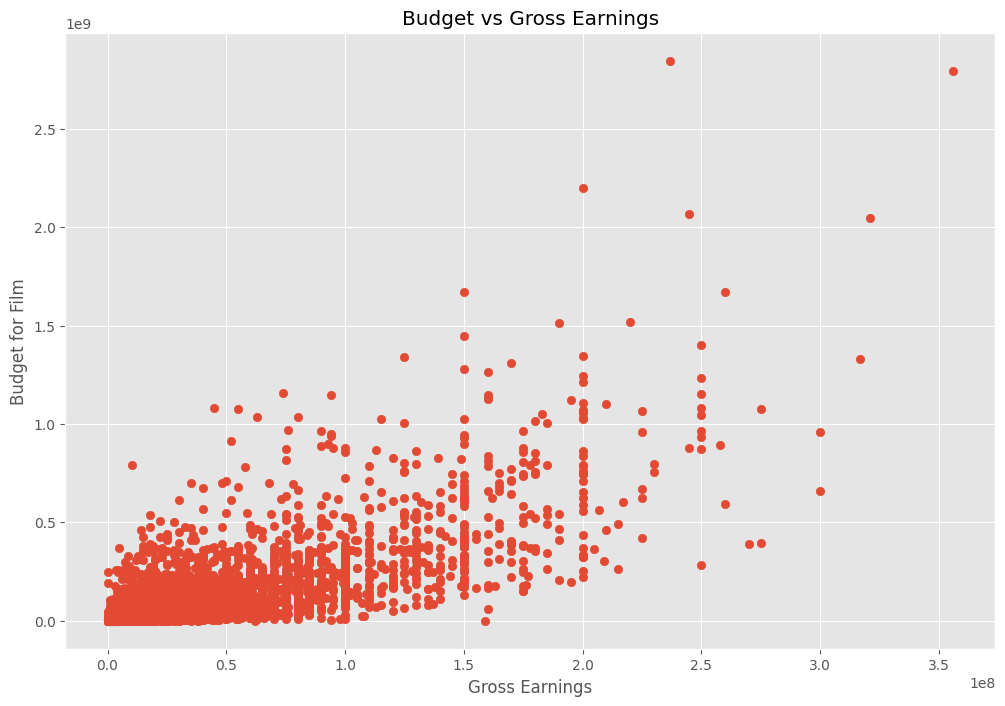

In [50]:
# Scatter plot with budget vs gross

plt.scatter(
    x = df['budget'], 
    y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [51]:
sorted_df = df.sort_values(by=['gross'], inplace=False, ascending=False)
sorted_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

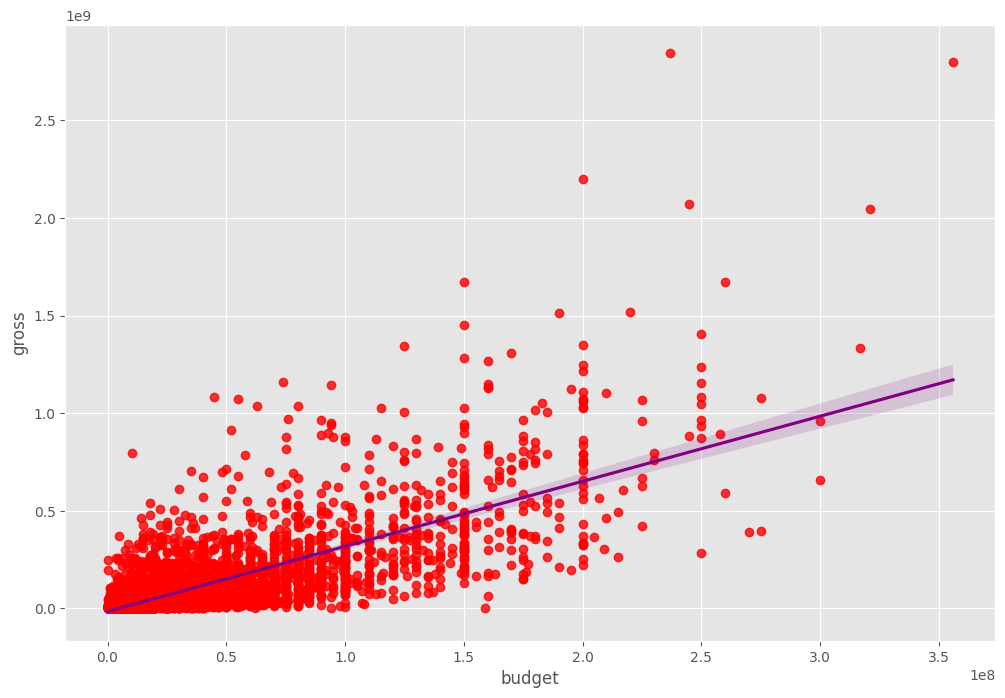

In [52]:
# Plot budget vs gross using seaborn

sns.regplot(
    x = 'budget',
    y = 'gross',
    data = sorted_df,
    scatter_kws= {'color': 'red'},
    line_kws = {'color': 'purple'}    
)

## Looking at correlation

In [53]:
# Let's start looking at correlation
df.corr(method= 'pearson') #pearson, kendall, spearman

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3429984060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method= 'pearson') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\43816506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


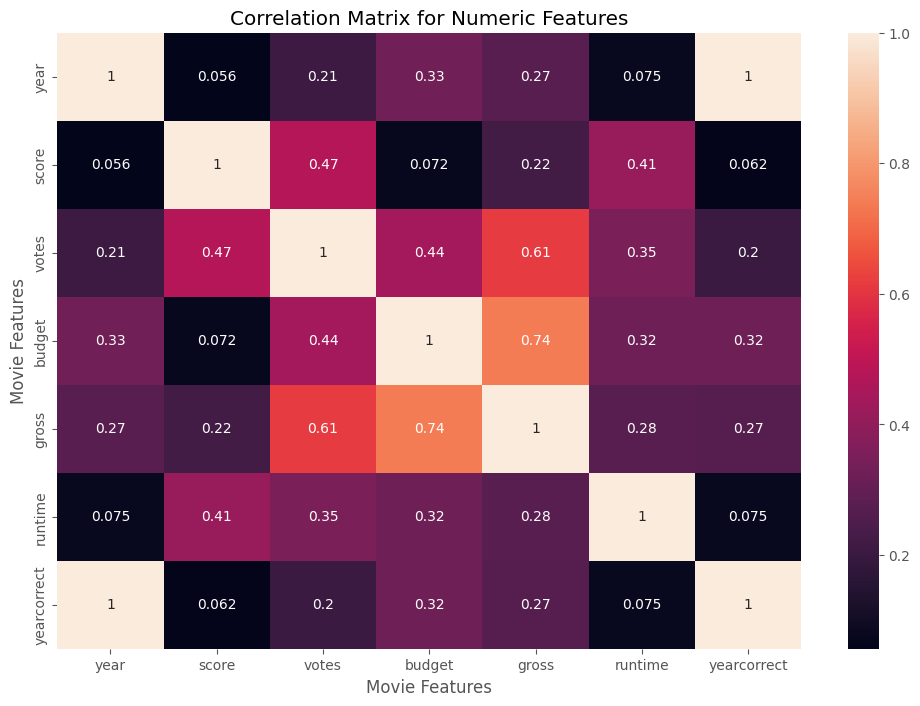

In [54]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(
    data = correlation_matrix,
    annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [55]:
#Lets look at Company   

sorted_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [56]:
df_numerized = sorted_df.copy()

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes


df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [57]:
sorted_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


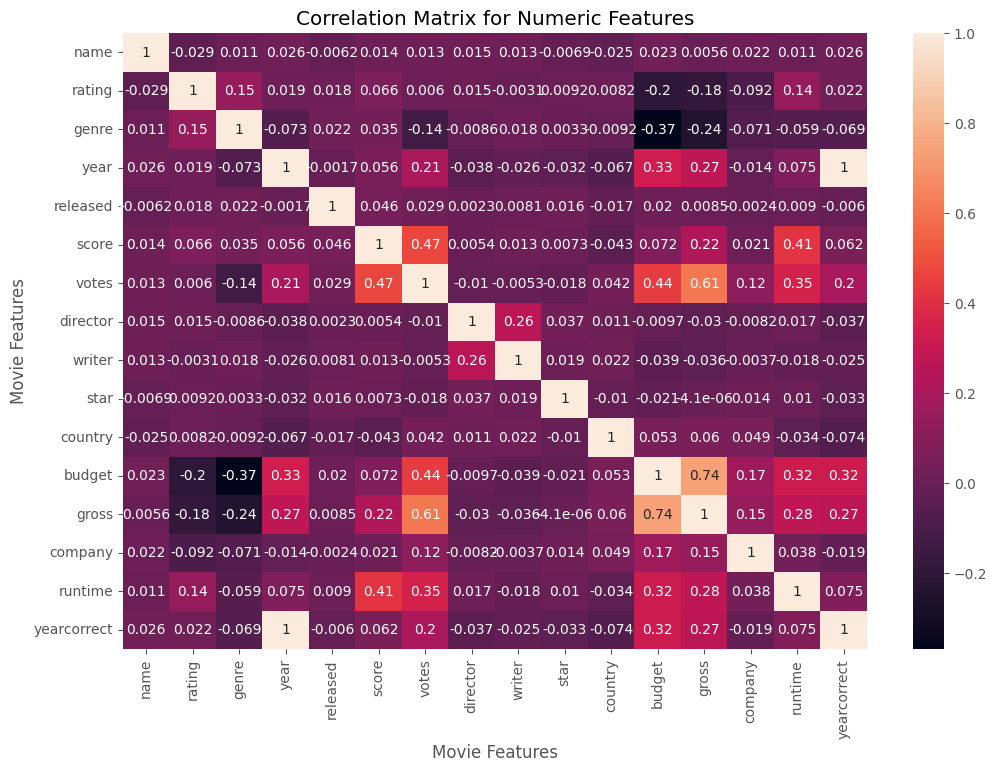

In [58]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(
    data = correlation_matrix,
    annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [80]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [79]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs.head()

name     name       1.0
rating   rating     1.0
runtime  runtime    1.0
company  company    1.0
gross    gross      1.0
dtype: float64

In [78]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 0.99)]
high_corr

budget  gross     0.740247
gross   budget    0.740247
        votes     0.614751
votes   gross     0.614751
dtype: float64